In [70]:
import os
_DF_DIR = os.path.join('..', '..', 'df_files')

import sys
sys.path.append('..')
import plotconfig

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
from scipy import stats
import pandas as pd
import numpy as np

In [140]:
# dbf1 = os.path.join(_DF_DIR, 'results_dimensionality_eeg.parquet')
dbf1 = os.path.join(_DF_DIR, 'results_dimensionality_face.parquet')
df1 = pd.read_parquet(dbf1, engine='pyarrow')

mask1 = ((df1['method_name'] != "SVR") &
        (df1['method_name'] != "MLP") &
        (df1['method_name'] != "RandomForest") &
        # (df1['n_component'] != 5) &
        # (df1['n_component'] != 150) &
        (df1['eeg_name'] == "EEG_Raw") & 
        (df1['test_name'] == "random"))

In [141]:
df = df1[mask1]
df
# np.unique(df['n_component'])

df['max_score'] = df['scores'].apply(max)

df

/var/folders/72/vn9k1z3x3wx4q4l2t51p2pjh0000gn/T/ipykernel_41569/2330557375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_score'] = df['scores'].apply(max)


,method_name,n_component,eeg_name,test_name,fit_time,source_id,raw_scores,shuffled_scores,target_raw_score,target_shuffled_score,scores,true_distances,euclidean_at_top_rank,pearsonr_statistic,pearsonr_pvalue,spearmanr_statistic,spearmanr_pvalue,target_rank,max_score
10,LinearRegression,512,EEG_Raw,random,267.173716,3998,"[0.9534574301561498, 0.9477898493632096, 0.947...","[1.001434264859372, 1.001381333254237, 0.99823...",0.944726,1.006005,"[1.050288906228753, 1.0567198778676168, 1.0535...","[22.729925318787256, 13.093911794698634, 25.53...",0.264815,-0.752282,2.112705e-12,-0.719311,4.761134e-11,2,1.066464
11,LinearRegression,20,EEG_Raw,random,262.562392,3998,"[0.9636255890038301, 0.9685866594415625, 0.968...","[1.0054935064015351, 1.014209994241799, 1.0031...",0.937535,0.991010,"[1.043423433520338, 1.0472146567861316, 1.0361...","[22.729925318787256, 13.093911794698634, 25.53...",0.000000,-0.869332,1.056060e-19,-0.864740,2.690630e-19,1,1.057027
12,LinearRegression,6,EEG_Raw,random,254.466035,3998,"[0.9854437954125895, 0.9639109832008224, 0.984...","[1.0146815554220803, 0.9895910564957578, 1.010...",0.963848,1.003563,"[1.0297704734334567, 1.0265004890675382, 1.026...","[22.729925318787256, 13.093911794698634, 25.53...",2.150975,-0.883603,4.529851e-21,-0.883468,4.675823e-21,10,1.045560
13,LinearRegression,10,EEG_Raw,random,276.422664,3998,"[0.951887491528119, 0.9640676920629623, 0.9713...","[0.9915649790632086, 0.99884920687687, 1.00524...",0.936621,0.981655,"[1.0417308320924694, 1.036234225091023, 1.0350...","[22.729925318787256, 13.093911794698634, 25.53...",3.271021,-0.849165,5.063188e-18,-0.860239,6.514608e-19,3,1.049541
14,LinearRegression,1,EEG_Raw,random,262.829604,3998,"[0.9827608576059769, 0.9875997761901342, 1.011...","[1.0044712633928565, 1.0021289279483878, 1.015...",1.005482,1.034656,"[1.022219772386786, 1.0147839456327234, 1.0040...","[22.729925318787256, 13.093911794698634, 25.53...",0.000000,-0.610603,1.107053e-07,-0.567102,1.154826e-06,1,1.029149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,DummyScoring_Mean,2,EEG_Raw,random,11.180238,2347,"[1.0079478452788906, 0.9901411015449304, 1.003...","[1.0079478452788906, 0.9901411015449304, 1.003...",0.989334,0.989334,"[0.9999990686052683, 1.0000003505316466, 0.999...","[21.11742874927802, 13.839977121571705, 20.036...",0.057005,-0.043513,3.706553e-01,-0.054182,3.404763e-01,55,1.000001
10196,DummyScoring_Mean,300,EEG_Raw,random,12.687193,2347,"[0.9971132486569765, 0.9962952285435549, 1.003...","[0.9971132486569765, 0.9962952285435549, 1.003...",1.007399,1.007399,"[0.9999991538441684, 0.9999993376928021, 0.999...","[21.11742874927802, 13.839977121571705, 20.036...",17.667405,0.049134,6.453550e-01,0.050514,6.492491e-01,46,1.000001
10197,DummyScoring_Mean,8,EEG_Raw,random,11.168690,2347,"[0.9999765565238292, 1.0073709149363, 1.020162...","[0.9999765565238292, 1.0073709149363, 1.020162...",1.003221,1.003221,"[0.9999995818856963, 1.0000005086000239, 0.999...","[21.11742874927802, 13.839977121571705, 20.036...",43.468657,-0.087530,2.530179e-01,-0.114699,1.914279e-01,2,1.000001
10198,DummyScoring_Mean,4,EEG_Raw,random,10.948524,2347,"[1.010015722701802, 1.0193387680216475, 1.0104...","[1.010015722701802, 1.0193387680216475, 1.0104...",1.006601,1.006601,"[1.0000001480037242, 1.0000005738214535, 0.999...","[21.11742874927802, 13.839977121571705, 20.036...",5.609892,0.082425,7.343755e-01,0.073243,7.109451e-01,33,1.000001


(0.0, 30.0)

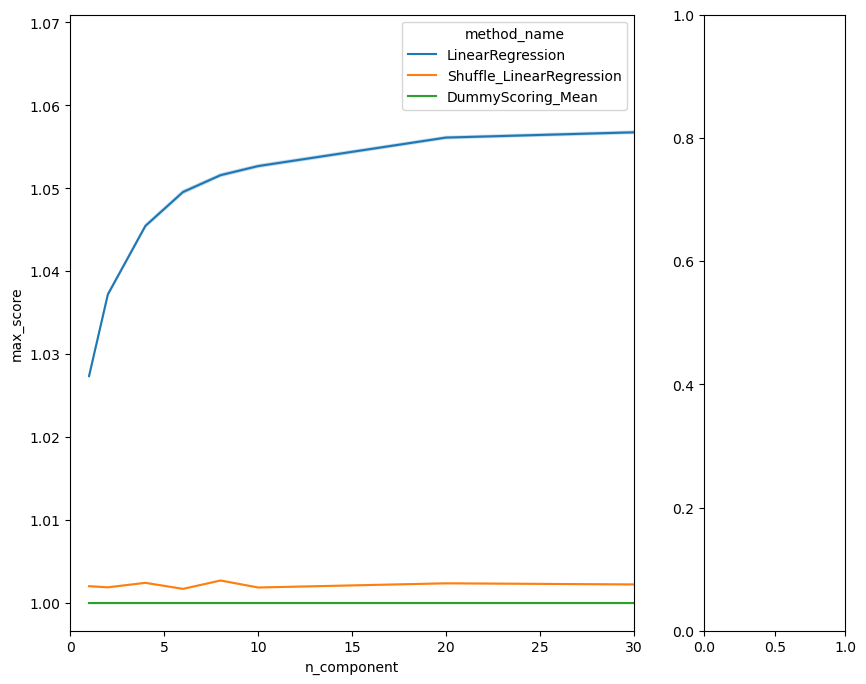

In [142]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=(10, 8), 
                               gridspec_kw={'width_ratios': [4, 1]})

sns.lineplot(data=df, 
             x='n_component', 
             y='max_score', 
             hue='method_name', 
             errorbar=('se', 1),
             ax=ax1)
# 
ax1.set_xlim([0, 30])

(0.0, 30.0)

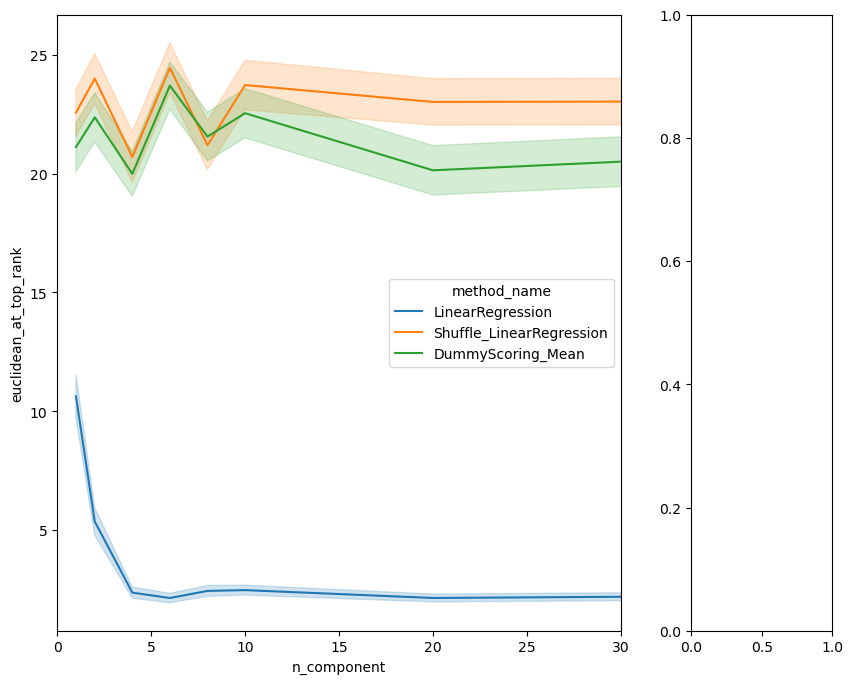

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=(10, 8), 
                               gridspec_kw={'width_ratios': [4, 1]})

sns.lineplot(data=df, 
             x='n_component', 
             y='euclidean_at_top_rank', 
             hue='method_name', 
             errorbar=('se', 1),
             ax=ax1)
# 
ax1.set_xlim([0, 30])

(0.0, 30.0)

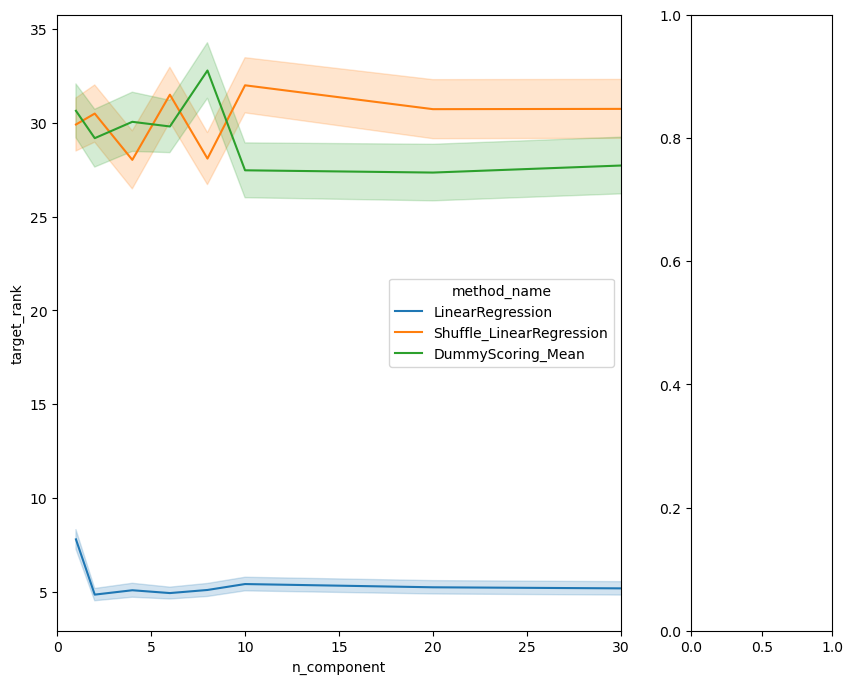

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=(10, 8), 
                               gridspec_kw={'width_ratios': [4, 1]})

sns.lineplot(data=df, 
             x='n_component', 
             y='target_rank', 
             hue='method_name', 
             errorbar=('se', 1),
             ax=ax1)

# ax1.set_xscale('log')
ax1.set_xlim([0, 30])

(0.0, 30.0)

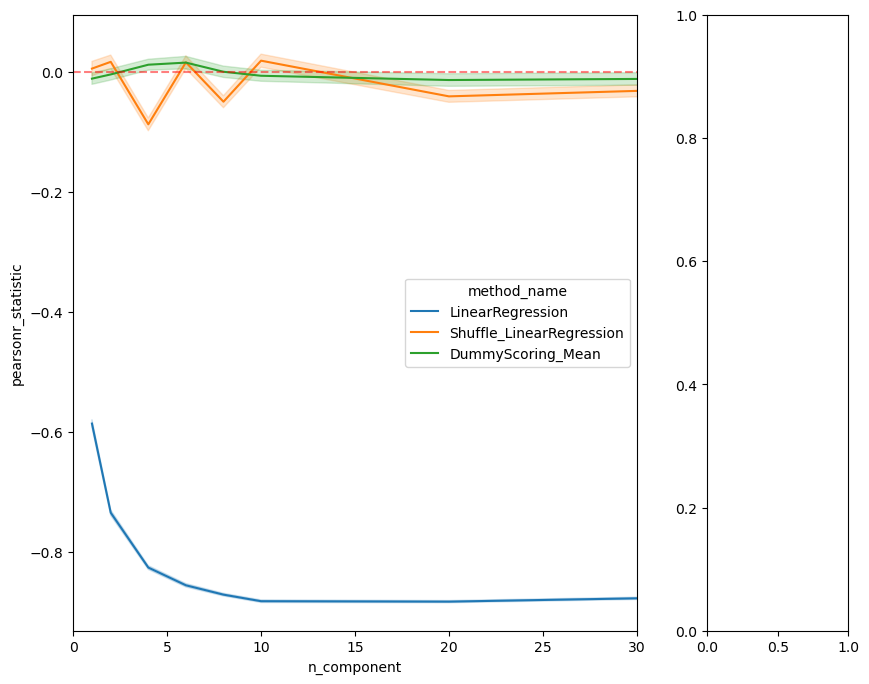

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=(10, 8), 
                               gridspec_kw={'width_ratios': [4, 1]})

sns.lineplot(data=df, 
             x='n_component', 
             y='pearsonr_statistic', 
             hue='method_name', 
             errorbar=('se', 1),
             ax=ax1)

ax1.axhline(y=plotconfig.IR_RANDOM_PEARSON_STATISTIC, color='r', linestyle='--', alpha=0.5, label='Theoretical Random')

ax1.set_xlim([0, 30])

In [99]:
plt.close() 

In [18]:
df = pd.concat([df1[mask1], df2[mask2]], axis=0)

mask = ((df['training_size'] == 9000))
df = df[mask]


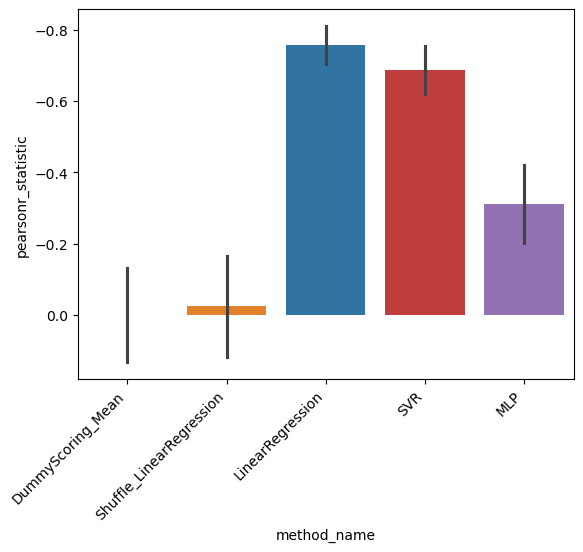

In [19]:

order = ['DummyScoring_Mean', 
         'Shuffle_LinearRegression', 
         'LinearRegression', 
         'SVR', 
         'MLP']

sns.barplot(data=df, 
            x='method_name', 
            y='pearsonr_statistic', 
            hue='method_name', 
            order=order,
            errorbar='sd')

plt.xticks(rotation=45, ha='right')

plt.gca().invert_yaxis()

